In [19]:
import sys
import os

# Append the parent directory to the system path
# Assuming `War_peace_functions_class_based.py` is in the parent directory
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)
sys.path.append(os.path.abspath("../Fig_1"))
sys.path.append(os.path.abspath("../.."))

from tango_model import *
import matplotlib.pyplot as plt
data_dir = os.path.join(os.getcwd(), "../../Saved_networks/")
sexus_dir = os.path.join(os.getcwd(), "../../Data/")
import importlib
import tango_model as tango_model

importlib.reload(sys.modules['tango_model'])
import scipy as sp
import torch
import networkx as nx
import pandas as pd



In [12]:
N           = 170000
M           = 28
#T           = 100
r_old_mean  = 0.2
pexp        = 1.55
lb          = 0.15
ub1         = 70
ub2         = 250
window      = 52
old_dist    = "gamma"
alpha       = 2
n_couples   = int(N/10)
margin      = 1/30
dt          = 1 #Time step of one day

In [13]:
# Import network data
network_data = pd.read_csv(data_dir + f'Network_N={N:.1e}_ub={ub1}.csv')
member_data = pd.read_csv(data_dir + f'Member_data_N={N:.1e}_ub={ub1}.csv')

# Extract member data
seeking = torch.tensor(member_data["seeking"].values, dtype=torch.uint8)
r_new = torch.tensor(member_data["r_new"].values, dtype=torch.float32)
r_old = torch.tensor(member_data["r_old"].values, dtype=torch.float32)
# tot_enc and tot_par are not needed for simulation state

# Load network indices and strengths
rows = torch.tensor(network_data["rows"].values, dtype=torch.int32)
cols = torch.tensor(network_data["cols"].values, dtype=torch.int32)
strengths = torch.tensor(network_data["strengths"].values, dtype=torch.int32)

# Reconstruct indices by repeating edges according to strengths
indices_rows = rows.repeat_interleave(strengths)
indices_cols = cols.repeat_interleave(strengths)
indices = torch.stack([indices_rows, indices_cols])

# Load tot_log_peace data
tot_log_peace_df = pd.read_csv(data_dir + f'tot_log_N={N:.1e}_ub={ub1}.csv')
tot_log_rows = torch.tensor(tot_log_peace_df["rows"].values, dtype=torch.int32)
tot_log_cols = torch.tensor(tot_log_peace_df["cols"].values, dtype=torch.int32)
tot_log_t = torch.tensor(tot_log_peace_df["t"].values, dtype=torch.int32)
repeats = torch.tensor(tot_log_peace_df["repeats"].values, dtype=torch.int32)

# Reconstruct tot_log by expanding repeats (uncoalesce)
expanded_rows = tot_log_rows.repeat_interleave(repeats)
expanded_cols = tot_log_cols.repeat_interleave(repeats)
expanded_t = tot_log_t.repeat_interleave(repeats)
tot_log_peace = torch.stack([expanded_rows, expanded_cols, expanded_t])

# Adjust time coordinates to negative times
max_t = tot_log_peace[2].max()
tot_log_peace[2] -= (max_t + 1)

In [14]:
# Create simulation object and load the state
simulation1 = EpidemicSimulation(N,M,r_old_mean,pexp,old_dist,alpha,ub1,lb)
simulation1.load_state(
    indices=indices,
    seeking=seeking,
    r_new=r_new,
    r_old=r_old,
    tot_log=tot_log_peace,
    t=0  # Start at time 0
)
tot_encounters1,tot_partners1 = simulation1.analyze_encounters()

In [15]:
# Import network data
network_data = pd.read_csv(data_dir + f'Network_N={N:.1e}_ub={ub2}.csv')
member_data = pd.read_csv(data_dir + f'Member_data_N={N:.1e}_ub={ub2}.csv')

# Extract member data
seeking = torch.tensor(member_data["seeking"].values, dtype=torch.uint8)
r_new = torch.tensor(member_data["r_new"].values, dtype=torch.float32)
r_old = torch.tensor(member_data["r_old"].values, dtype=torch.float32)
# tot_enc and tot_par are not needed for simulation state

# Load network indices and strengths
rows = torch.tensor(network_data["rows"].values, dtype=torch.int32)
cols = torch.tensor(network_data["cols"].values, dtype=torch.int32)
strengths = torch.tensor(network_data["strengths"].values, dtype=torch.int32)

# Reconstruct indices by repeating edges according to strengths
indices_rows = rows.repeat_interleave(strengths)
indices_cols = cols.repeat_interleave(strengths)
indices = torch.stack([indices_rows, indices_cols])

# Load tot_log_peace data
tot_log_peace_df = pd.read_csv(data_dir + f'tot_log_N={N:.1e}_ub={ub2}.csv')
tot_log_rows = torch.tensor(tot_log_peace_df["rows"].values, dtype=torch.int32)
tot_log_cols = torch.tensor(tot_log_peace_df["cols"].values, dtype=torch.int32)
tot_log_t = torch.tensor(tot_log_peace_df["t"].values, dtype=torch.int32)
repeats = torch.tensor(tot_log_peace_df["repeats"].values, dtype=torch.int32)

# Reconstruct tot_log by expanding repeats (uncoalesce)
expanded_rows = tot_log_rows.repeat_interleave(repeats)
expanded_cols = tot_log_cols.repeat_interleave(repeats)
expanded_t = tot_log_t.repeat_interleave(repeats)
tot_log_peace = torch.stack([expanded_rows, expanded_cols, expanded_t])

# Adjust time coordinates to negative times
max_t = tot_log_peace[2].max()
tot_log_peace[2] -= (max_t + 1)

In [16]:
# Create simulation object and load the state
simulation2 = EpidemicSimulation(N,M,r_old_mean,pexp,old_dist,alpha,ub2,lb)
simulation2.load_state(
    indices=indices,
    seeking=seeking,
    r_new=r_new,
    r_old=r_old,
    tot_log=tot_log_peace,
    t=0  # Start at time 0
)
tot_encounters2,tot_partners2 = simulation2.analyze_encounters()

Effective rate of encounters:                                       0.79 pr wk (SEXUS: 0.74)
Fraction of inactive:                                               0.42 (SEXUS 0.12)

Mean  r_new among inactive:                                         0.38 pr yr (total: 2.82)
Mean  r_old among inactive:                                         1.26 pr wk (total: 1.40)
Effective rate of encounters:                                       0.79 pr wk (SEXUS: 0.74)
Fraction of inactive:                                               0.42 (SEXUS 0.12)

Mean  r_new among inactive:                                         0.38 pr yr (total: 2.82)
Mean  r_old among inactive:                                         1.26 pr wk (total: 1.40)
Effective rate of encounters:                                       0.80 pr wk (SEXUS: 0.74)
Fraction of inactive:                                               0.43 (SEXUS 0.12)

Mean  r_new among inactive:                                         0.39 pr yr (total: 5

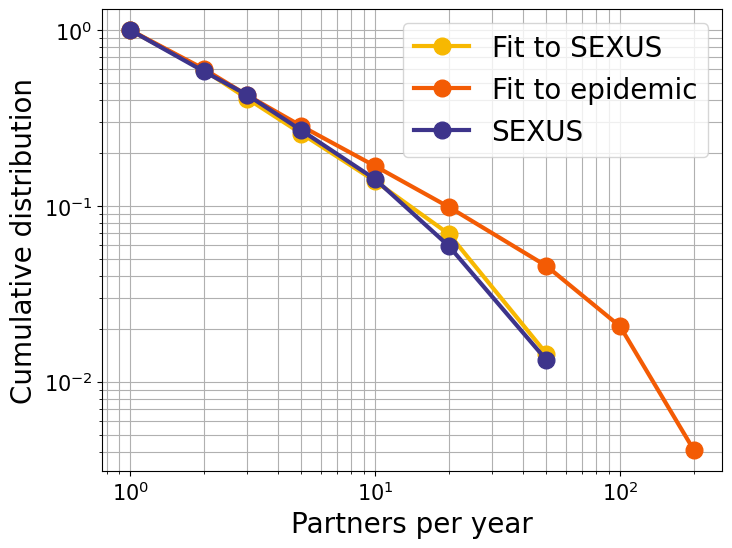

In [21]:
active_mask1         = tot_partners1 >= 1 

print(f"Effective rate of encounters:                                       {(tot_encounters1[active_mask1]).float().mean()/52:.2f} pr wk (SEXUS: 0.74)")
print(f"Fraction of inactive:                                               {(tot_partners1 == 0).sum()/N:.2f} (SEXUS 0.12)")
print("")

print(f"Mean  r_new among inactive:                                         {(simulation1.r_new[~active_mask1]).float().mean()*365:.2f} pr yr (total: {(simulation1.r_new).float().mean()*365:.2f})")
print(f"Mean  r_old among inactive:                                         {(simulation1.r_old[~active_mask1]).float().mean()*7:.2f} pr wk (total: {(simulation1.r_old).float().mean()*7:.2f})")

active_mask1         = tot_partners1 >= 1 

print(f"Effective rate of encounters:                                       {(tot_encounters1[active_mask1]).float().mean()/52:.2f} pr wk (SEXUS: 0.74)")
print(f"Fraction of inactive:                                               {(tot_partners1 == 0).sum()/N:.2f} (SEXUS 0.12)")
print("")

print(f"Mean  r_new among inactive:                                         {(simulation1.r_new[~active_mask1]).float().mean()*365:.2f} pr yr (total: {(simulation1.r_new).float().mean()*365:.2f})")
print(f"Mean  r_old among inactive:                                         {(simulation1.r_old[~active_mask1]).float().mean()*7:.2f} pr wk (total: {(simulation1.r_old).float().mean()*7:.2f})")

# Extract the active partners
active_partners1 = tot_partners1[active_mask1].numpy()

# Step 1: Define the specific x-axis values
x_values = np.array([1, 2, 3, 5, 10, 20, 50])
x_values2 = np.array([1, 2, 3, 5, 10, 20, 50, 100, 200])
# Step 2: Calculate CCDF for only these x-axis values
ccdf1 = [] # Fit to SEXUS
n = len(active_partners1)
for value in x_values:
    # Probability that a value is greater than or equal to `value`
    prob = np.sum(active_partners1 >= value) / n
    ccdf1.append(prob)

active_mask2         = tot_partners2 >= 1 

print(f"Effective rate of encounters:                                       {(tot_encounters2[active_mask2]).float().mean()/52:.2f} pr wk (SEXUS: 0.74)")
print(f"Fraction of inactive:                                               {(tot_partners2 == 0).sum()/N:.2f} (SEXUS 0.12)")
print("")

print(f"Mean  r_new among inactive:                                         {(simulation2.r_new[~active_mask2]).float().mean()*365:.2f} pr yr (total: {(simulation2.r_new).float().mean()*365:.2f})")
print(f"Mean  r_old among inactive:                                         {(simulation2.r_old[~active_mask2]).float().mean()*7:.2f} pr wk (total: {(simulation2.r_old).float().mean()*7:.2f})")

active_mask2         = tot_partners2 >= 1 

print(f"Effective rate of encounters:                                       {(tot_encounters2[active_mask2]).float().mean()/52:.2f} pr wk (SEXUS: 0.74)")
print(f"Fraction of inactive:                                               {(tot_partners2 == 0).sum()/N:.2f} (SEXUS 0.12)")
print("")

print(f"Mean  r_new among inactive:                                         {(simulation2.r_new[~active_mask2]).float().mean()*365:.2f} pr yr (total: {(simulation2.r_new).float().mean()*365:.2f})")
print(f"Mean  r_old among inactive:                                         {(simulation2.r_old[~active_mask2]).float().mean()*7:.2f} pr wk (total: {(simulation2.r_old).float().mean()*7:.2f})")

# Extract the active partners
active_partners2 = tot_partners2[active_mask2].numpy()

# Step 2: Calculate CCDF for only these x-axis values
ccdf2 = []
n = len(active_partners2)
for value in x_values2:
    # Probability that a value is greater than or equal to `value`
    prob = np.sum(active_partners2 >= value) / n
    ccdf2.append(prob)

labelsize = 20
markersize = 12
linewidth = 3
legendsize = 20
ticklabelsize = 15
# Step 3: Plot CCDF for selected x-values
plt.figure(figsize=(8, 6))
plt.plot(x_values, ccdf1, label='Fit to SEXUS', marker='o',markersize = markersize,linewidth = linewidth, color = "#f7b801")
plt.plot(x_values2, ccdf2, label='Fit to epidemic', marker='o',markersize = markersize,linewidth = linewidth, color = "#f35b04")
degree_dist_ccdf_sexus = np.genfromtxt(os.path.join(sexus_dir, 'Degree_dist_CCDF_SEXUS.csv'), delimiter=',', skip_header=1)
plt.plot(x_values,degree_dist_ccdf_sexus, marker='o',label = "SEXUS",markersize = markersize,linewidth = linewidth,color = "#3d348b")
plt.xticks(x_values,fontsize = ticklabelsize)  # Show only the selected x-axis values
plt.yticks(fontsize = ticklabelsize)
plt.xlabel('Partners per year',fontsize = labelsize)
plt.ylabel('Cumulative distribution',fontsize = labelsize)
plt.xscale("log")
plt.yscale("log")
#plt.title('Complementary Cumulative Distribution Function (CCDF)')
plt.grid(True,which = "both")
plt.legend(fontsize = legendsize)
plt.show()